In [1]:
%config IPCompleter.greedy=True

In [2]:
#Importing the required libraries for TSA

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import itertools
from scipy import optimize
import statsmodels.tsa.stattools as ts

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [11]:
amazon=pd.read_excel("amazon.xlsx")

In [12]:
amazon.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [13]:
amazon.replace({'month' : { 'Janeiro' : '1', 'Fevereiro' : '2','Março' : '3','Abril' : '4','Maio':'5','Junho':'6',
                          'Julho':'7','Agosto':'8','Setembro':'9','Outubro':'10', 'Novembro':'11', 'Dezembro':'11'}}, inplace=True)

In [14]:
amazon.sort_values(by=['month','year'],ascending=True)

,year,state,month,number,date
0,1998,Acre,1,0.000,1998-01-01
239,1998,Alagoas,1,0.000,1998-01-01
479,1998,Amapa,1,0.000,1998-01-01
718,1998,Amazonas,1,0.000,1998-01-01
957,1998,Bahia,1,0.000,1998-01-01
1196,1998,Ceara,1,0.000,1998-01-01
1435,1998,Distrito Federal,1,0.000,1998-01-01
1674,1998,Espirito Santo,1,0.000,1998-01-01
1913,1998,Goias,1,0.000,1998-01-01
2152,1998,Maranhao,1,0.000,1998-01-01


In [15]:
amazon_analysis=amazon.pivot_table(values='number',index='year',columns='month',aggfunc='mean')
amazon_analysis
#Loan_Src2_Analysis = Loan_Src2.pivot_table(values='id',index='term',columns='loan_status',aggfunc='count')

month,1,10,11,2,3,4,5,6,7,8,9
year,,,,,,,,,,,
1998,0.000000,95.294185,88.027870,0.000000,0.000000,0.000000,0.000000,50.081519,161.396741,146.837630,111.592370
1999,40.037037,121.102444,106.712611,47.555556,24.703704,26.555556,67.111111,53.081519,131.045296,131.998444,139.044148
2000,28.814815,200.516444,75.570222,20.777778,31.407407,19.888889,33.488667,71.161407,126.012519,241.655296,88.145630
2001,20.259259,195.917556,103.578944,39.222222,5.966963,40.037037,33.266407,65.728333,182.835370,188.179000,98.156333
2002,61.259259,178.627481,143.008019,58.148148,62.185185,62.296296,47.871407,109.958444,252.812296,160.291704,105.370778
2003,188.555556,209.025519,182.927130,88.814815,59.967815,99.148148,64.703704,81.381963,137.152185,159.313852,129.810852
2004,100.185185,215.057741,187.189204,46.481481,75.555556,49.444444,41.644926,125.218222,143.997815,110.162852,142.064593
2005,119.398815,141.522259,126.486981,79.740741,63.185185,37.444444,58.171889,130.344222,181.621111,171.311222,60.766333
2006,120.555556,174.450407,78.362222,61.703704,65.703704,29.333333,29.925926,72.888889,140.108926,271.782481,129.865630


In [16]:
amazon.drop(['date'],axis=1,inplace=True)
amazon['dateInt']=amazon['year'].astype(str) + amazon['month'].astype(str).str.zfill(2)+ "01"
amazon['Date'] = pd.to_datetime(amazon['dateInt'], format='%Y%m%d')
amazon.drop(['dateInt'],axis=1,inplace=True)

In [9]:
amazon

,year,state,month,number,Date
0,1998,Acre,1,0.0,1998-01-01
1,1999,Acre,1,0.0,1999-01-01
2,2000,Acre,1,0.0,2000-01-01
3,2001,Acre,1,0.0,2001-01-01
4,2002,Acre,1,0.0,2002-01-01
5,2003,Acre,1,10.0,2003-01-01
6,2004,Acre,1,0.0,2004-01-01
7,2005,Acre,1,12.0,2005-01-01
8,2006,Acre,1,4.0,2006-01-01
9,2007,Acre,1,0.0,2007-01-01


# TIME SERIES ANALYSIS

In [17]:
amazon_TS=amazon.groupby('Date')
amazon_TS=pd.DataFrame(amazon_TS.number.mean())
amazon_TS.reset_index(inplace=True)
amazon_TS.head()


,Date,number
0,1998-01-01,0.0
1,1998-02-01,0.0
2,1998-03-01,0.0
3,1998-04-01,0.0
4,1998-05-01,0.0


In [18]:
# dividing test-train
train = amazon_TS.iloc[0:170,:]
test = amazon_TS.iloc[171:,:]
total_timeser=amazon_TS['number']
train.set_index(['Date'],inplace=True)
#train.head()
test.set_index(['Date'],inplace=True)
#test.head()

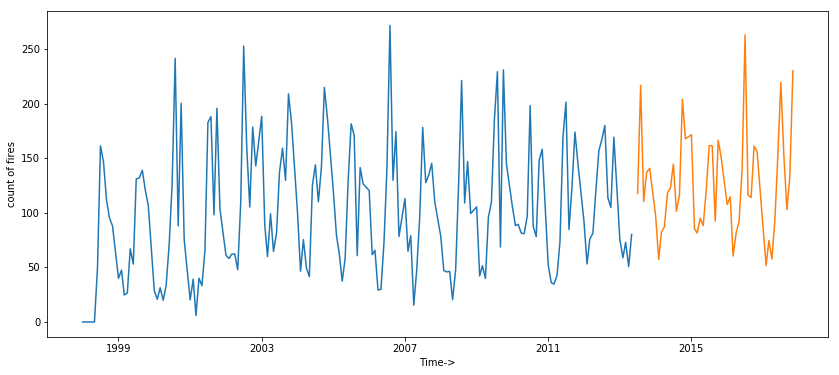

In [19]:
plt.figure(figsize=(14,6))
plt.plot(train,label='train')
plt.plot(test,label='test')
plt.ylabel('count of fires')
plt.xlabel('Time->')
plt.show()

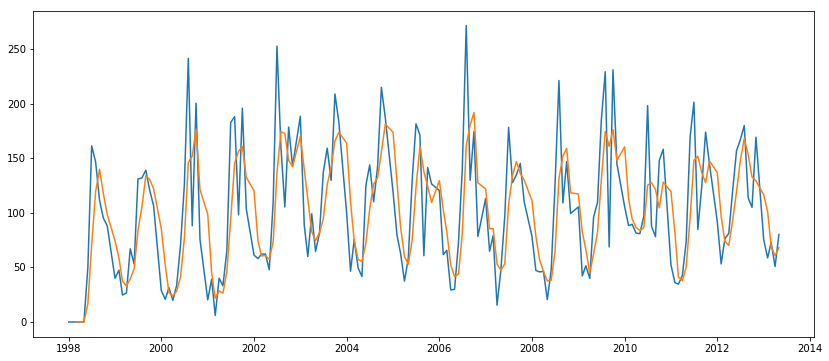

In [25]:
# We will do a smoothing of the TS using rolling mean keeping in mind that the smoothed should replicate the original TS
rolling = train['number'].rolling(window=3)
rolling_mean = rolling.mean()

#plot original and transformed DS
plt.figure(figsize=(14,6))
plt.plot(train,label='train')
plt.plot(rolling_mean,label='rolling mean')
#rolling_mean.plot(color='red')
plt.show()

In [26]:
#Corrections to fill Nan values at the beginning, lost due to rolling mean creation with window=3
rolling_mean[0]=0
rolling_mean[1]=0

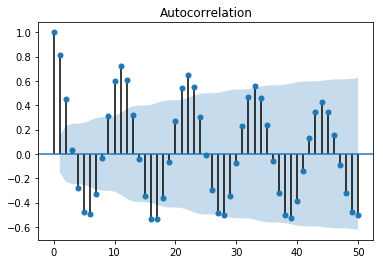

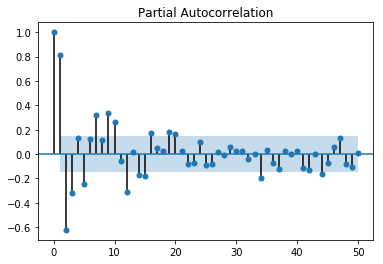

In [27]:
# Compute and plot the ACF for the time series
import statsmodels.graphics.tsaplots as tsa
tsa.plot_acf(rolling_mean, lags=50)
plt.show()

# Compute and plot the ACF for the time series
tsa.plot_pacf(rolling_mean, lags=50)
plt.show()

In [48]:
# p = 5
# q = 4 

In [28]:
y=pd.DataFrame(rolling_mean)
y.reset_index(inplace=True)

In [29]:
#Preparing values for model

x_data = np.arange(1,171)
y_data = y['number']

## Classical Decomposition

In [31]:


def test_func(x, p1,p2, p3,p4,p5):
    return (np.sin(p5*x)*(p1*(x**2)+p2*(x)+p3)+p4)

params, params_covariance = optimize.curve_fit(test_func, x_data, y_data)
print(params)

[ -1.65173767e-03   2.86847871e-01  -4.44263531e+00   1.00130889e+02
   9.85276197e-01]


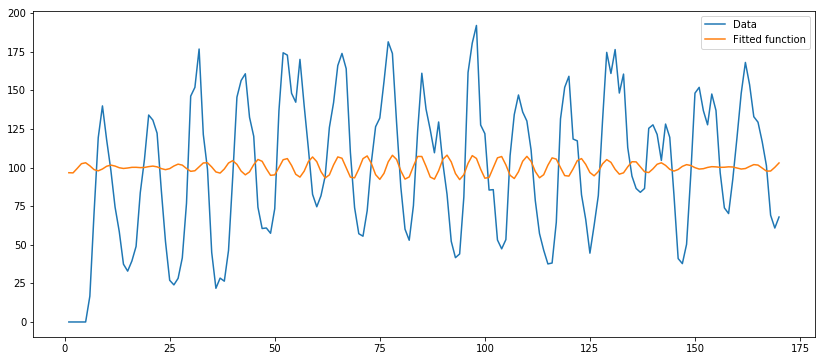

In [32]:
plt.figure(figsize=(14, 6))
plt.plot(x_data, y_data, label='Data')
plt.plot(x_data, test_func(x_data, params[0], params[1],params[2],params[3],params[4]), label='Fitted function')
plt.legend(loc='best')
plt.show()

# ARIMA

In [53]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, d and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [54]:
#iteration over all the combinations of (p,d,q)

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{} - BIC:{}'.format(param, param_seasonal, round(results.aic,4), round(results.bic,4)))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2090.0818 - BIC:2093.2117
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1856.0525 - BIC:1862.165
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1741.8521 - BIC:1744.9083
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1602.3971 - BIC:1608.3506
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1746.4065 - BIC:1752.5316
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1728.2843 - BIC:1737.453
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1613.2617 - BIC:1619.2289
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1603.2313 - BIC:1612.1615
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1964.8905 - BIC:1971.1384
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1800.4082 - BIC:1809.5577
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1733.4953 - BIC:1739.595
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1585.3593 - BIC:1594.2688
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1746.8797 - BIC:1756.0675
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1711.6534 - BIC:1723.8528
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1609.6861 - BIC:1618.6369
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1586.529 - BIC:1598.4

In [38]:
arima_model_train = sm.tsa.statespace.SARIMAX(train,
                                order=(3, 1, 4),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results_arima_train = arima_model_train.fit()

print(results_arima_train.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4525      0.311      1.457      0.145      -0.156       1.061
ar.L2         -0.7800      0.093     -8.378      0.000      -0.962      -0.598
ar.L3          0.7553      0.312      2.422      0.015       0.144       1.366
ma.L1         -1.2947      0.345     -3.749      0.000      -1.972      -0.618
ma.L2          1.1014      0.218      5.045      0.000       0.674       1.529
ma.L3         -1.3963      0.339     -4.114      0.000      -2.061      -0.731
ma.L4          0.5876      0.282      2.082      0.037       0.035       1.141
ar.S.L12       0.0154      0.138      0.111      0.911      -0.256       0.287
ma.S.L12      -0.3974      0.170     -2.334      0.020      -0.731      -0.064
sigma2      3361.7748   1634.334      2.057      0.040     158.539    6565.011


In [39]:
#Predicted values based on ARIMA model

pred_arima_train = results_arima_train.get_prediction(dynamic=False)
pred_arima_train_ci = pred_arima_train.conf_int()

No handles with labels found to put in legend.


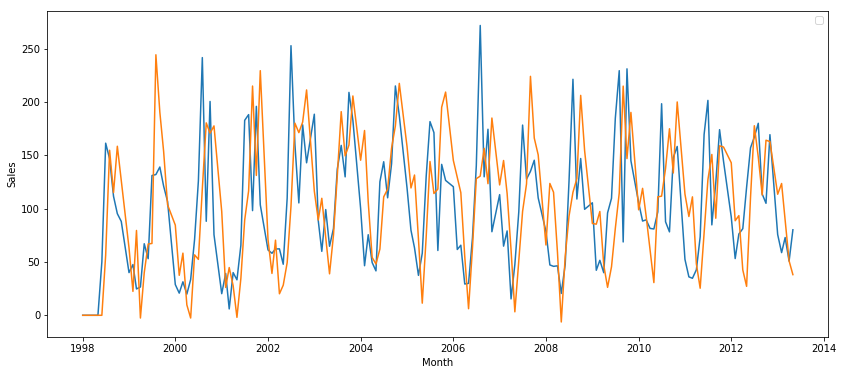

In [40]:
#Plotting the predicted and actual data together

plt.figure(figsize = (14,6))

plt.plot(train)
plt.plot(pred_arima_train.predicted_mean)
#plot1 = train.plot(label='observed')
#pred_arima_train.predicted_mean.plot(ax=plot1, label='predicted (arima)')

plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend(loc = 'best')
plt.show()

In [36]:
arima_model = sm.tsa.statespace.SARIMAX(total_timeser,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results_arima = arima_model.fit()

print(results_arima.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4568      0.063      7.278      0.000       0.334       0.580
ma.L1         -1.0000    171.825     -0.006      0.995    -337.770     335.770
ma.S.L12      -1.0000    171.806     -0.006      0.995    -337.734     335.734
sigma2      2562.2747      0.060   4.27e+04      0.000    2562.157    2562.392


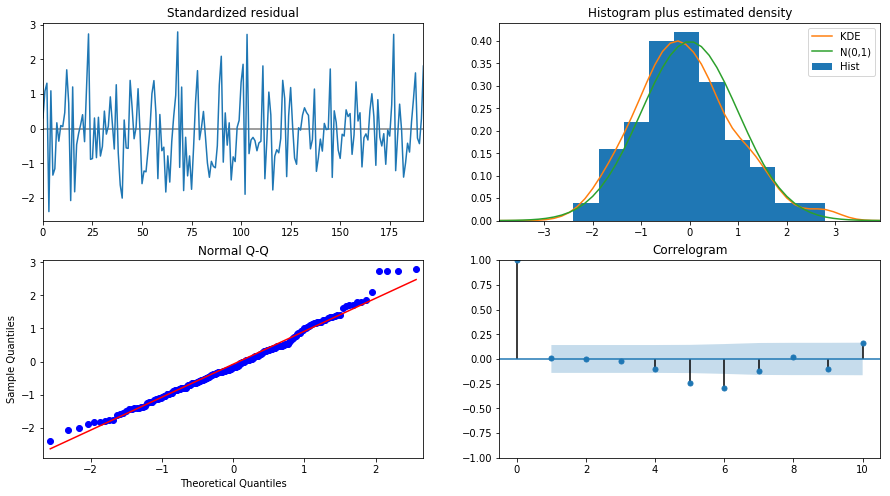

In [37]:
#Model diagnostics

results_arima.plot_diagnostics(figsize=(15, 8))
plt.show()

In [62]:
pred_arima = results_arima.get_prediction(dynamic=False)
pred_arima_ci = pred_arima.conf_int()

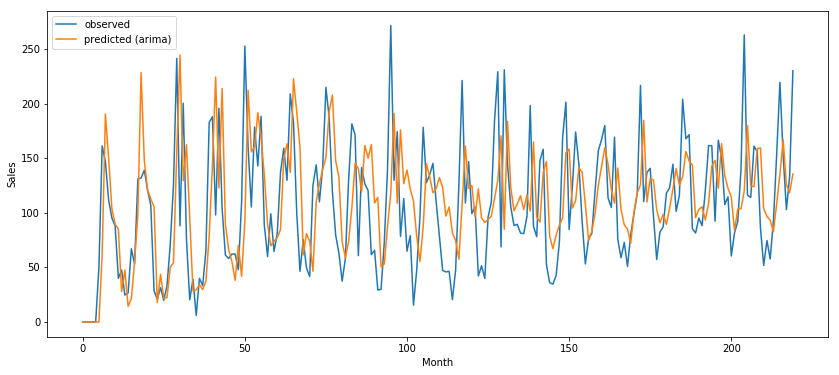

In [63]:
plt.figure(figsize = (14,6))

plot1 = total_timeser.plot(label='observed')
pred_arima.predicted_mean.plot(ax=plot1, label='predicted (arima)')

plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend(loc = 'best')
plt.show()

In [65]:
#Calculating MAPE for Auto ARIMA Method

arima_pred_test = pred_arima.predicted_mean[171:]
n = len(arima_pred_test)
total = 0
for i in range(n):
    total = total + np.absolute((100*(test.iloc[i] - arima_pred_test.iloc[i])/test.iloc[i]))

MAPE = total/n
print("MAPE Value: {}".format(round(MAPE,4)))

MAPE Value: number    29.5806
dtype: float64


# Analysis of other variables

In [41]:
amazon.head(10)

,year,state,month,number,Date
0,1998,Acre,1,0.0,1998-01-01
1,1999,Acre,1,0.0,1999-01-01
2,2000,Acre,1,0.0,2000-01-01
3,2001,Acre,1,0.0,2001-01-01
4,2002,Acre,1,0.0,2002-01-01
5,2003,Acre,1,10.0,2003-01-01
6,2004,Acre,1,0.0,2004-01-01
7,2005,Acre,1,12.0,2005-01-01
8,2006,Acre,1,4.0,2006-01-01
9,2007,Acre,1,0.0,2007-01-01


In [60]:
amazon_analysis=amazon.pivot_table(values='number',index='state',columns='year',aggfunc='mean')
amazon_analysis

year,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
state,,,,,,,,,,,,,,,,,,,,
Acre,60.833333,27.750000,36.166667,69.000000,128.662417,78.909833,98.664833,82.037583,101.780833,101.090000,95.305500,69.272083,39.601083,59.100333,98.833000,92.344667,46.439583,99.277083,102.064500,56.220909
Alagoas,7.166667,14.333333,10.250000,7.166667,21.500000,24.916667,13.250000,18.083333,13.416667,10.666667,23.083333,27.083333,18.500000,19.333333,29.333333,17.333333,15.833333,49.166667,33.333333,13.250000
Amapa,23.166667,8.416667,21.083333,108.416667,71.841333,137.666667,188.416667,105.916667,68.083333,36.666667,65.416667,92.418250,60.083333,91.666667,175.250000,81.250000,124.166667,112.858333,124.430083,133.181818
Amazonas,78.833333,88.416667,71.083333,108.083333,237.666667,127.022333,191.517250,138.094000,83.136667,49.133417,226.416667,110.050083,193.709000,137.711500,92.553417,75.434750,198.825750,99.166167,171.747667,82.445909
Bahia,102.057250,99.798500,114.886250,202.304250,190.058333,256.345833,137.034083,196.505500,209.090417,184.189917,159.391917,182.096833,209.584167,168.753917,287.911417,214.304167,204.780583,196.254833,293.352833,131.074000
Ceara,134.334500,140.666667,184.250000,153.958417,37.842333,66.293667,31.939583,56.685083,92.431083,142.635000,101.034000,77.553333,173.971000,64.500167,244.758667,151.506750,209.333333,110.008500,149.053167,232.272727
Distrito Federal,8.583333,3.833333,4.000000,5.333333,12.416667,8.000000,23.250000,7.666667,6.333333,22.833333,9.583333,7.666667,42.083333,22.750000,14.416667,8.416667,20.916667,14.333333,20.166667,37.272727
Espirito Santo,18.166667,20.000000,14.583333,10.833333,24.750000,59.000000,14.500000,10.083333,17.916667,31.833333,20.916667,18.000000,18.750000,27.166667,29.333333,20.833333,28.916667,85.916667,54.500000,21.272727
Goias,62.509917,159.174667,209.691083,172.155250,134.942917,173.237083,149.894833,142.421500,107.871917,74.026833,88.290500,223.500000,158.101333,150.739333,181.831333,248.250000,130.824083,230.175250,211.894583,143.739182


## State - yearwise plot

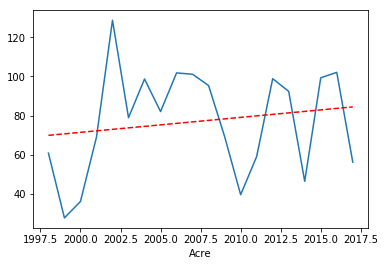

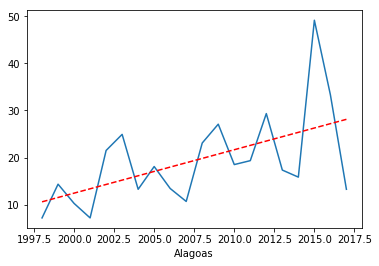

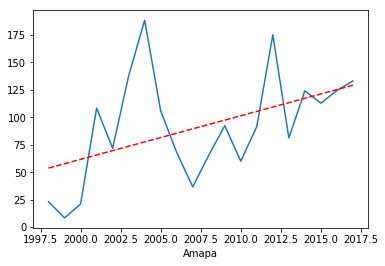

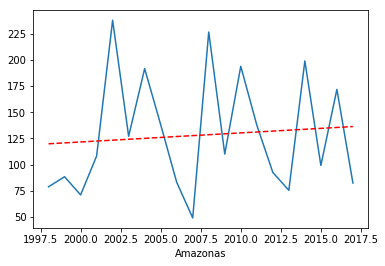

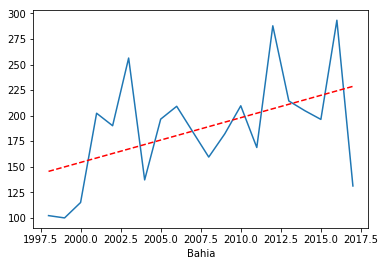

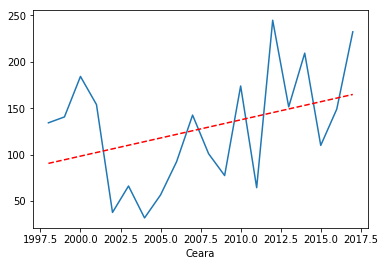

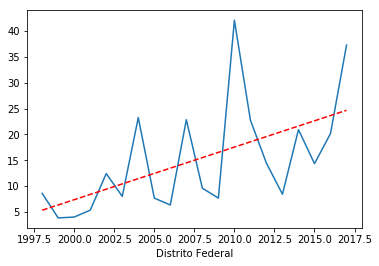

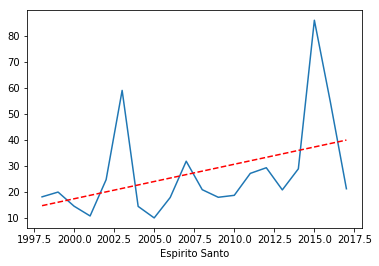

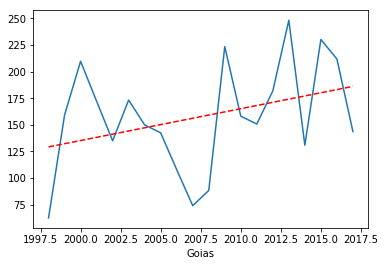

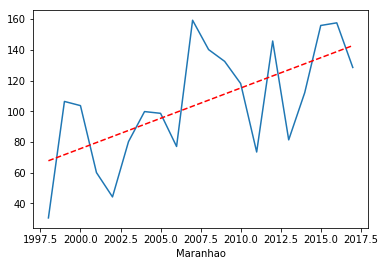

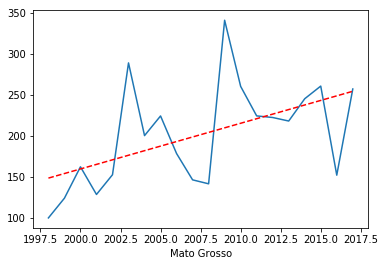

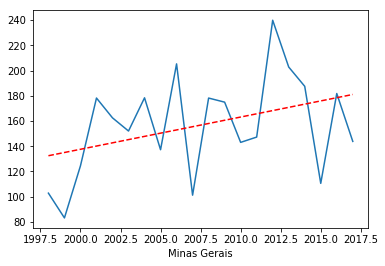

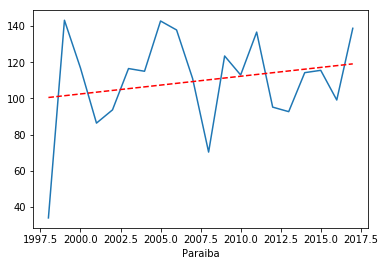

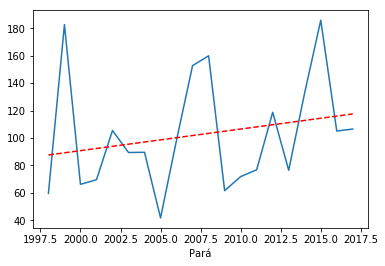

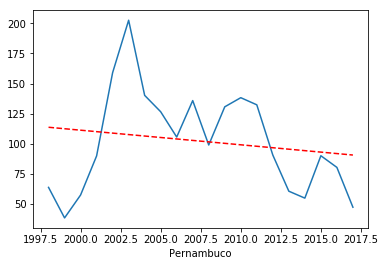

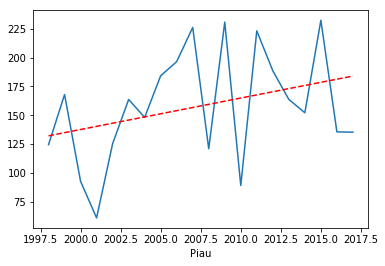

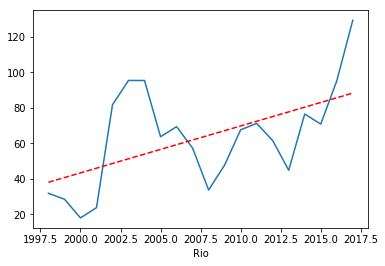

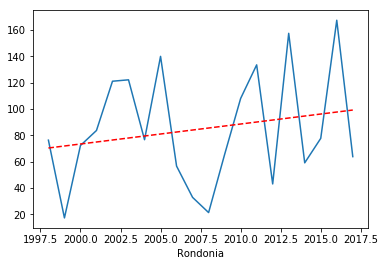

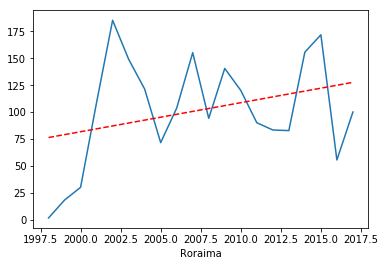

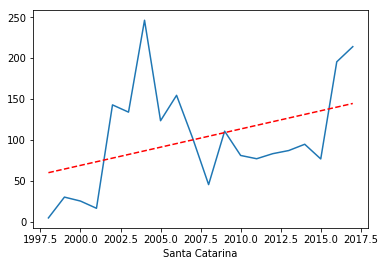

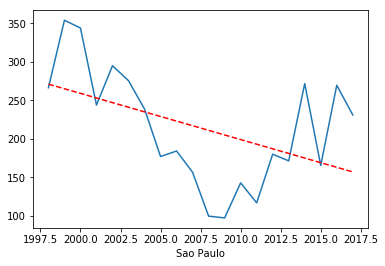

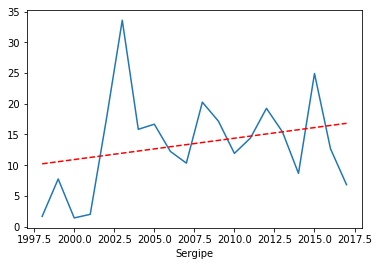

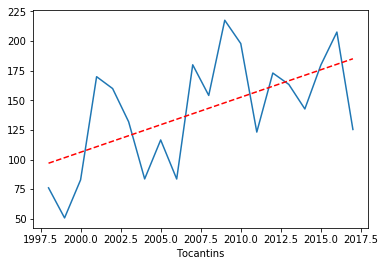

In [87]:
x=amazon_analysis.columns
for i in amazon_analysis.index:
    y=list(amazon_analysis.loc[i,:])#.plot()
    plt.plot(x, y)
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.plot(x,p(x),"r--")
    plt.xlabel(i)
    plt.show()

In [86]:
amazon_analysis2=amazon.pivot_table(values='number',index='state',aggfunc='mean')
amazon_analysis2.sort_values(by=['number'],ascending=False)

,number
state,
Sao Paulo,213.896226
Mato Grosso,201.351523
Bahia,187.222703
Piau,158.174674
Goias,157.721841
Minas Gerais,156.800243
Tocantins,141.037176
Amazonas,128.243218
Ceara,127.314071
